In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
insurance = pd.read_csv("insurance.csv")
df = insurance.copy()
df.sample(3)

,age,sex,bmi,children,smoker,region,charges
249,29,male,28.975,1,no,northeast,4040.55825
1016,19,female,24.605,1,no,northwest,2709.24395
1281,47,female,27.645,2,yes,northwest,24535.69855


age: Yaş bilgisi.

sex: Cinsiyet bilgisi.

bmi: Vücut kitle indeksi (Body Mass Index).

children: Sahip olunan çocuk sayısı.

smoker: Sigara içip içmemek bilgisi.

region: Konut bölgesi bilgisi.

charges: Sağlık sigortası prim ücretleri.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [5]:
df.duplicated().sum()

1

In [6]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


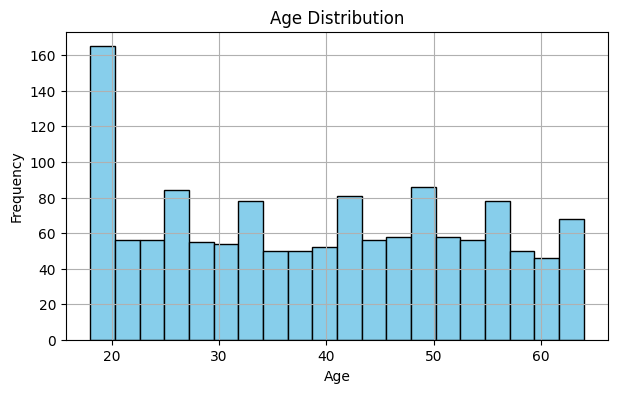

In [9]:
df['age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

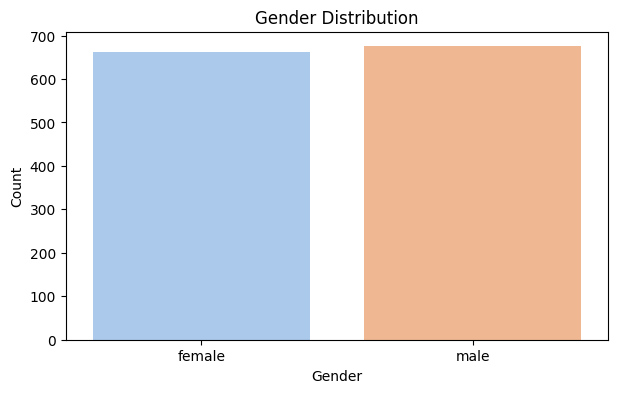

In [10]:
sns.countplot(x='sex', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

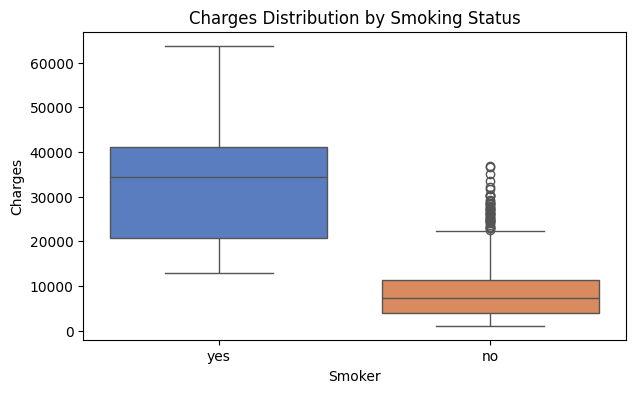

In [11]:
sns.boxplot(x='smoker', y='charges', data=df, palette='muted')
plt.title('Charges Distribution by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

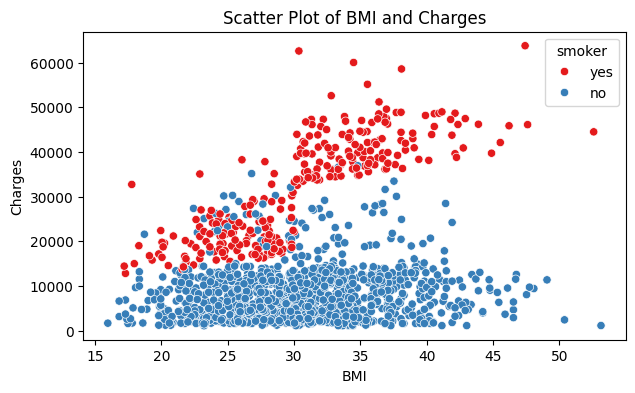

In [12]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, palette='Set1')
plt.title('Scatter Plot of BMI and Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

In [13]:
df = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)

In [14]:
df.sample(2)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1048,25,22.515,1,3594.17085,False,False,True,False,False
643,23,34.960,3,4466.62140,False,False,True,False,False


In [15]:
df = df[[col for col in df.columns if col != 'charges'] + ['charges']]

In [16]:
df.sample(2)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
700,21,34.87,0,False,False,False,True,False,2020.5523
593,21,21.85,1,False,True,False,False,False,15359.1045


## Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Çoklu Doğrusal Regresyon modeli oluşturma
model = LinearRegression()


In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
model.coef_

array([  251.24617223,   328.38309611,   522.15536198,  -111.90716088,
       22874.44640656,  -465.74659644,  -936.09932553,  -765.58388611])

In [22]:
model.intercept_

-11516.781029185739

In [23]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [24]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

## Predicting Test Data

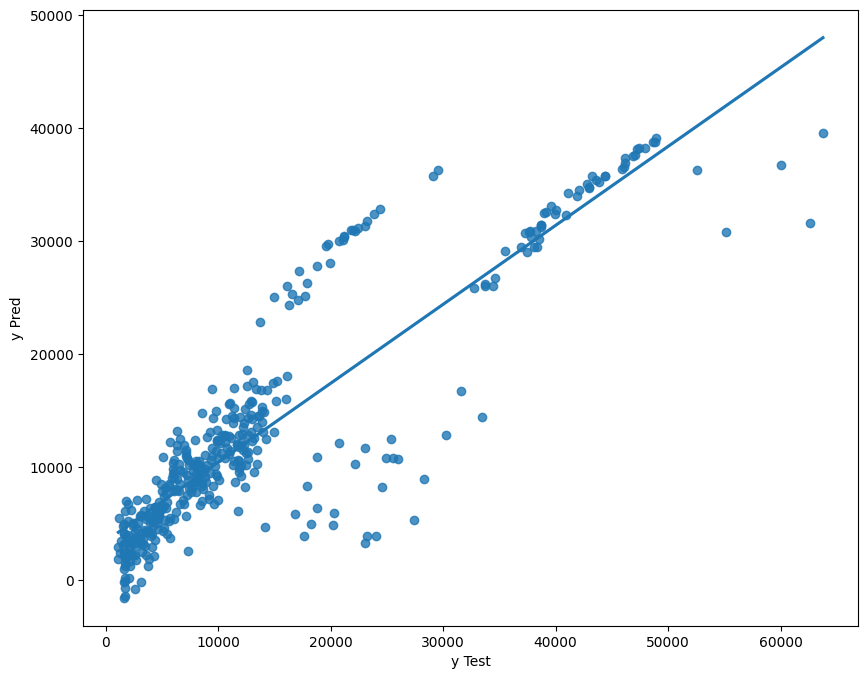

In [25]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(10,8))

sns.regplot(x=y_test, y=y_pred, ci=None,)

plt.xlabel('y Test')
plt.ylabel('y Pred')

plt.show()


## Evaluating the Model

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

# tüm regression metriclerimizi birarada görmek için yukarıdaki fonksiyonu tanımlıyoruz.

slr_score = train_val(y_train, y_train_pred, y_test, y_pred, "s_linear")
slr_score 


,s_linear_train,s_linear_test
R2,7.362637e-01,7.724364e-01
mae,4.165831e+03,4.181816e+03
mse,3.581293e+07,3.894017e+07
rmse,5.984391e+03,6.240206e+03


In [29]:
residuals = y_test - y_pred

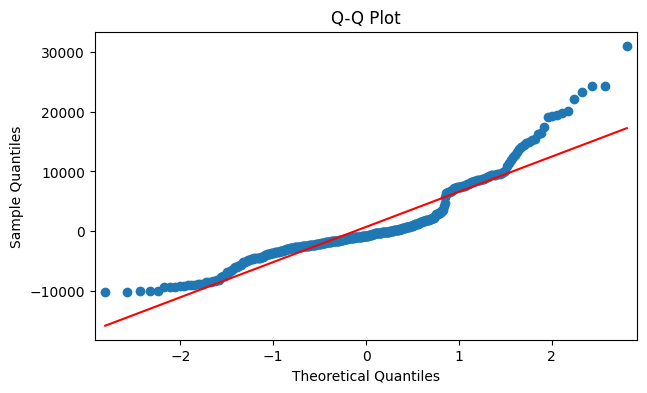

In [30]:
import statsmodels.api as sm
sm.qqplot(residuals, line='r')
plt.title('Q-Q Plot')
plt.show()

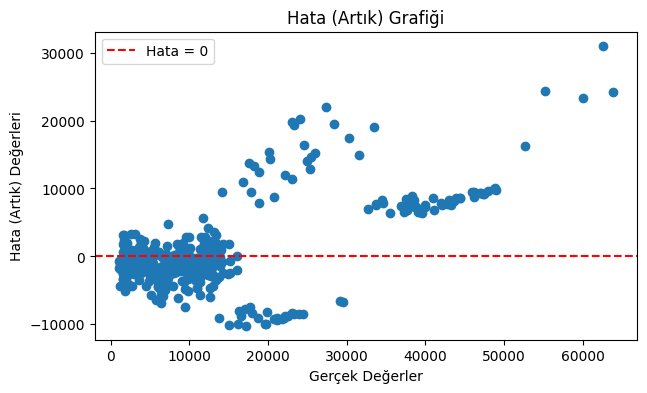

In [31]:
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--', label='Hata = 0')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Hata (Artık) Değerleri')
plt.title('Hata (Artık) Grafiği')
plt.legend()
plt.show()